In [6]:
from astropy.table import Table
from sedfitter.sed import SEDCube
import os
import numpy as np
import numpy.ma as ma
from astropy.io import ascii
from astropy.table import Table,Column
from astropy import units as u
from astropy.visualization import quantity_support
from astropy.constants import L_sun, M_sun, R_sun,sigma_sb
from math import pi
quantity_support()
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
t = Table.read('/lupus3/mpound/filter_convolve/models_r17/s---s-i/parameters.fits')

In [7]:
t.show_in_notebook(display_length=15)

idx,MODEL_NAME,star.radius,star.temperature,scattering,inclination
0,01QyhoBc_01,0.2728,4888.0,1,45.0
1,01Xx6elC_01,0.383,12050.0,1,45.0
2,03ZZRVTe_01,31.22,4967.0,1,45.0
3,03amqKIp_01,13.81,7891.0,1,45.0
4,03dloFhH_01,44.63,6450.0,1,45.0
5,03jGXYVQ_01,4.797,9889.0,1,45.0
6,05DVDxNM_01,0.6069,4998.0,1,45.0
7,05qQySTl_01,8.242,7737.0,1,45.0
8,05tRaRtL_01,50.31,6017.0,1,45.0
9,06Xo35xd_01,4.711,28510.0,1,45.0


In [10]:
t['star.R'] = t['star.radius']*R_sun 
t['star.radius'].unit='Rsun'
t['star.luminosity'] = 4.0*pi*sigma_sb*(t['star.R']**2)*(t['star.temperature']**4)
t['star.Lsun'] = t['star.luminosity']/L_sun
t['star.luminosity'].unit = 'W'
t['star.luminosity'].format='4.3E'
t['star.radius'].format='4.3E'
t['star.Lsun'].unit='Lsun'
t['star.Lsun'].format='5.3f'
t['star.Lsun'].format='5.3f'

In [11]:
t.show_in_notebook(display_length=15)

idx,MODEL_NAME,star.radius,star.temperature,scattering,inclination,star.R,star.luminosity,star.Lsun
,,solRad,,,,m solRad,W,solLum
0,01QyhoBc_01,2.728E-01,4888.0,1,45.0,189786960.0,1.465E+25,0.038
1,01Xx6elC_01,3.830E-01,12050.0,1,45.0,266453100.0,1.067E+27,2.786
2,03ZZRVTe_01,3.122E+01,4967.0,1,45.0,21719754000.0,2.046E+29,534.485
3,03amqKIp_01,1.381E+01,7891.0,1,45.0,9607617000.0,2.550E+29,666.206
4,03dloFhH_01,4.463E+01,6450.0,1,45.0,31049091000.0,1.189E+30,3105.888
5,03jGXYVQ_01,4.797E+00,9889.0,1,45.0,3337272900.0,7.590E+28,198.263
6,05DVDxNM_01,6.069E-01,4998.0,1,45.0,422220330.0,7.927E+25,0.207
7,05qQySTl_01,8.242E+00,7737.0,1,45.0,5733959400.000001,8.395E+28,219.305
8,05tRaRtL_01,5.031E+01,6017.0,1,45.0,35000667000.0,1.144E+30,2988.972


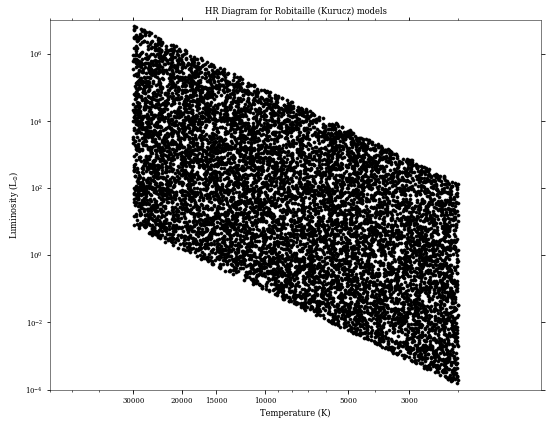

In [18]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [8.8,6.8]
import matplotlib.ticker
plt.scatter((t['star.temperature']),(t['star.Lsun']),c='k',s=10)
plt.xlim(1000,60000)
plt.ylim(1E-4,1E7)
plt.xlabel("Temperature (K)")
plt.ylabel("Luminosity (L$_{\odot}$)")
ax = plt.gca()
ax.invert_xaxis()
#plt.text(30000,175,"O",horizontalalignment='center',color=getcolor("O"),weight='bold')
#plt.text(20000,175,"B",horizontalalignment='center',color=getcolor("B"),weight='bold')
#plt.text(10000,175,"A",horizontalalignment='center',color=getcolor("A"),weight='bold')
#plt.text(7500,175,"F",horizontalalignment='center',color=getcolor("F"),weight='bold')#,backgroundcolor='gray')
#plt.text(5500,175,"G",horizontalalignment='center',color=getcolor("G"),weight='bold')
#plt.text(4000,175,"K",horizontalalignment='center',color=getcolor("K"),weight='bold')
#plt.text(3000,175,"M",horizontalalignment='center',color=getcolor("M"),weight='bold')
#plt.text(15000,0.1,"WD",horizontalalignment='center',color=getcolor("DA"),weight='bold')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xticks([3000,5000,10000,15000,20000,30000])
ax.tick_params(bottom=True,top=True,left=True,right=True)
ax.tick_params(top=True, which="minor",axis="x")
ax.tick_params(right=True, which="minor",axis="y")

ax.get_xaxis().set_major_formatter(ScalarFormatter())
#ax.get_xaxis().set_minor_formatter(ScalarFormatter())
#u = list(set(classes))
plt.title('HR Diagram for Robitaille (Kurucz) models' )

#patches = [plt.plot([],[],marker=z,ls="",color='black',label=lu[z])[0] for z in u]
#plt.legend(handles=patches,loc='best',numpoints=1,ncol=1, bbox_to_anchor=(.9,0.65),framealpha=1)
#print(len(u),len(lu))
plt.savefig("Robitaille_HRdiagram.pdf")

In [21]:
tsources = Table.read("sdss_standards.votab")
tsources2 = Table.read("sdss_standards_UBVRIJHK_distance.xml")

In [23]:
tsources.colnames

['StarName',
 'RA2000',
 'DEC2000',
 'r',
 'u_g',
 'g_r',
 'r_i',
 'i_z',
 'rms_r',
 'rms_u_g',
 'rms_g_r',
 'rms_r_i',
 'rms_i_z',
 'n_u',
 'n_g',
 'n_r',
 'n_i',
 'n_z',
 'u',
 'rms_u',
 'g',
 'rms_g',
 'i',
 'rms_i',
 'z',
 'rms_z',
 'OName',
 'epoch',
 'pmRA',
 'e_pmRA',
 'pmDEC',
 'e_pmDEC',
 'pmRef',
 'SpType',
 'SpTypeRef',
 'Note',
 'TYPED_ID',
 'ANG_DIST',
 'MAIN_ID',
 'OTYPE_S',
 'RA_d',
 'DEC_d',
 'COO_ERR_MAJA_d',
 'COO_ERR_MINA_d',
 'COO_ERR_ANGLE_d',
 'PMRA',
 'PMDEC',
 'PM_ERR_MAJA',
 'PM_ERR_MINA',
 'PM_ERR_ANGLE',
 'PLX_VALUE',
 'RV_VALUE',
 'Z_VALUE',
 'GALDIM_MAJAXIS',
 'GALDIM_MINAXIS',
 'GALDIM_ANGLE',
 'SP_TYPE',
 'MORPH_TYPE',
 'NB_REF',
 'FILTER_NAME_U',
 'FLUX_U',
 'FLUX_ERROR_U',
 'FLUX_SYSTEM_U',
 'FLUX_BIBCODE_U',
 'FLUX_VAR_U',
 'FLUX_MULT_U',
 'FLUX_QUAL_U',
 'FLUX_UNIT_U',
 'FILTER_NAME_B',
 'FLUX_B',
 'FLUX_ERROR_B',
 'FLUX_SYSTEM_B',
 'FLUX_BIBCODE_B',
 'FLUX_VAR_B',
 'FLUX_MULT_B',
 'FLUX_QUAL_B',
 'FLUX_UNIT_B',
 'FILTER_NAME_V',
 'FLUX_V',
 'FLUX_ERR

In [26]:
tsources.show_in_notebook(display_length=10)

idx,StarName,RA2000,DEC2000,r,u_g,g_r,r_i,i_z,rms_r,rms_u_g,rms_g_r,rms_r_i,rms_i_z,n_u,n_g,n_r,n_i,n_z,u,rms_u,g,rms_g,i,rms_i,z,rms_z,OName,epoch,pmRA,e_pmRA,pmDEC,e_pmDEC,pmRef,SpType,SpTypeRef,Note,TYPED_ID,ANG_DIST,MAIN_ID,OTYPE_S,RA_d,DEC_d,COO_ERR_MAJA_d,COO_ERR_MINA_d,COO_ERR_ANGLE_d,PMRA,PMDEC,PM_ERR_MAJA,PM_ERR_MINA,PM_ERR_ANGLE,PLX_VALUE,RV_VALUE,Z_VALUE,GALDIM_MAJAXIS,GALDIM_MINAXIS,GALDIM_ANGLE,SP_TYPE,MORPH_TYPE,NB_REF,FILTER_NAME_U,FLUX_U,FLUX_ERROR_U,FLUX_SYSTEM_U,FLUX_BIBCODE_U,FLUX_VAR_U,FLUX_MULT_U,FLUX_QUAL_U,FLUX_UNIT_U,FILTER_NAME_B,FLUX_B,FLUX_ERROR_B,FLUX_SYSTEM_B,FLUX_BIBCODE_B,FLUX_VAR_B,FLUX_MULT_B,FLUX_QUAL_B,FLUX_UNIT_B,FILTER_NAME_V,FLUX_V,FLUX_ERROR_V,FLUX_SYSTEM_V,FLUX_BIBCODE_V,FLUX_VAR_V,FLUX_MULT_V,FLUX_QUAL_V,FLUX_UNIT_V,FILTER_NAME_R,FLUX_R,FLUX_ERROR_R,FLUX_SYSTEM_R,FLUX_BIBCODE_R,FLUX_VAR_R,FLUX_MULT_R,FLUX_QUAL_R,FLUX_UNIT_R,FILTER_NAME_I,FLUX_I,FLUX_ERROR_I,FLUX_SYSTEM_I,FLUX_BIBCODE_I,FLUX_VAR_I,FLUX_MULT_I,FLUX_QUAL_I,FLUX_UNIT_I,FILTER_NAME_J,FLUX_J,FLUX_ERROR_J,FLUX_SYSTEM_J,FLUX_BIBCODE_J,FLUX_VAR_J,FLUX_MULT_J,FLUX_QUAL_J,FLUX_UNIT_J,FILTER_NAME_H,FLUX_H,FLUX_ERROR_H,FLUX_SYSTEM_H,FLUX_BIBCODE_H,FLUX_VAR_H,FLUX_MULT_H,FLUX_QUAL_H,FLUX_UNIT_H,FILTER_NAME_K,FLUX_K,FLUX_ERROR_K,FLUX_SYSTEM_K,FLUX_BIBCODE_K,FLUX_VAR_K,FLUX_MULT_K,FLUX_QUAL_K,FLUX_UNIT_K,FILTER_NAME_u,FLUX_u,FLUX_ERROR_u,FLUX_SYSTEM_u,FLUX_BIBCODE_u,FLUX_VAR_u,FLUX_MULT_u,FLUX_QUAL_u,FLUX_UNIT_u,FILTER_NAME_g,FLUX_g,FLUX_ERROR_g,FLUX_SYSTEM_g,FLUX_BIBCODE_g,FLUX_VAR_g,FLUX_MULT_g,FLUX_QUAL_g,FLUX_UNIT_g,FILTER_NAME_r,FLUX_r,FLUX_ERROR_r,FLUX_SYSTEM_r,FLUX_BIBCODE_r,FLUX_VAR_r,FLUX_MULT_r,FLUX_QUAL_r,FLUX_UNIT_r,FILTER_NAME_i,FLUX_i,FLUX_ERROR_i,FLUX_SYSTEM_i,FLUX_BIBCODE_i,FLUX_VAR_i,FLUX_MULT_i,FLUX_QUAL_i,FLUX_UNIT_i,FILTER_NAME_z,FLUX_z,FLUX_ERROR_z,FLUX_SYSTEM_z,FLUX_BIBCODE_z,FLUX_VAR_z,FLUX_MULT_z,FLUX_QUAL_z,FLUX_UNIT_z,Diameter_diameter,Diameter_Q,Diameter_unit,Diameter_error,Diameter_filter,Diameter_method,Diameter_bibcode,Distance_distance,Distance_Q,Distance_unit,Distance_merr,Distance_perr,Distance_method,Distance_bibcode,Fe_H_Teff,Fe_H_log_g,Fe_H_Fe_H,Fe_H_flag,Fe_H_CompStar,Fe_H_CatNo,Fe_H_bibcode,Herschel_ObsId,Herschel_alpha,Herschel_delta,ISO_TDT,ISO_alpha,ISO_delta,IUE_Homogenized_Name,IUE_ComplID,IUE_PROG,IUE_CL,IUE_D,IUE_CAM,IUE_IMAGE,IUE_A,IUE_FES,IUE_MD,IUE_ObsDate,IUE_Time,IUE_ExpTim,IUE_m,IUE_CEB,IUE_S,IUE_Comments,IUE_F,IUE_bibcode,MK_ds,MK_mss,MK_Spectral_type,MK_bibcode,PLX_plx,PLX_me,PLX_R,PLX_bibcode,PM_pmra,PM_me_pmra,PM_pmde,PM_me_pmde,PM_system,PM_bibcode,ROT_upVsini,ROT_Vsini,ROT_err,ROT_mes,ROT_qual,ROT_bibcode,V__vartyp,V__LoVmax,V__Vmax,V__R_Vmax,V__magtyp,V__UpVmin,V__Vmin,V__R_Vmin,V__UpPeriod,V__period,V__R_period,V__epoch,V__R_epoch,V__D_rt,V__R_D_rt,V__bibcode,velocities_type,velocities_Value,velocities_R,velocities_me,velocities_Acc,velocities_Nmes,velocities_nat,velocities_Q,velocities_dom,velocities_res,velocities_d,velocities_Date,velocities_Rem,velocities_Origin,velocities_bibcode,XMM_Obsno,OID4
,,hms,dms,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,mag,mag,mag,mag,mag,mag,mag,mag,,yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,arcs,,,deg,deg,mas,mas,deg,mas / yr,mas / yr,mas / yr,mas / yr,deg,mas,km / s,,arcm,arcm,deg,,,,,mag,,,,,,,,,mag,,,,,,,,,mag,,,,,,,,,mag,,,,,,,,,mag,,,,,,,,,mag,,,,,,,,,mag,,,,,,,,,mag,,,,,,,,,mag,,,,,,,,,mag,,,,,,,,,mag,,,,,,,,,mag,,,,,,,,,mag,,,,,,,,,,,,,,,,,,,,,,unit-degK,cm/s**2,,,,,,,h:m:s,d:m:s,,deg,deg,,,,,,,,,,,,,s,,,,,,,,,,,mas,mas,,,mas / yr,mas / yr,mas / yr,mas / yr,,,,km / s,,,,,,,mag,,,,mag,,,day,,day,,,,,,,,,,,,,,,,,,,,,
0,BD+17 4708,22:11:31.37,+18:05:34.1,9.35,0.92,0.29,0.1,0.02,0.001,0.001,0.001,0.001,0.001,114,114,115,114,114,10.559999999999999,0.0017320508075688774,9.639999999999999,0.001414213562373095,9.25,0.001414213562373095,9.23,0.0017320508075688774,109558,2000.0,507.2,1.3,57.6,1.3,TYC2,sdF8,Simbad,m,,--,BD+17 4708,SB*,332.88072996,18.09282178,0.200,0.195,90,506.370,60.488,0.425,0.340,90,8.351,-291.310,-0.0009710,--,--,0,sdF8,,